# Import libraries and mount drive

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/archive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/archive


In [ ]:
ls -a

1.benign.csv          4.gafgyt.tcp.csv      7.gafgyt.scan.csv
1.gafgyt.combo.csv    4.gafgyt.udp.csv      7.gafgyt.tcp.csv
1.gafgyt.junk.csv     4.mirai.ack.csv       7.gafgyt.udp.csv
1.gafgyt.scan.csv     4.mirai.scan.csv      8.benign.csv
1.gafgyt.tcp.csv      4.mirai.syn.csv       8.gafgyt.combo.csv
1.gafgyt.udp.csv      4.mirai.udp.csv       8.gafgyt.junk.csv
1.mirai.ack.csv       4.mirai.udpplain.csv  8.gafgyt.scan.csv
1.mirai.scan.csv      5.benign.csv          8.gafgyt.tcp.csv
1.mirai.syn.csv       5.gafgyt.combo.csv    8.gafgyt.udp.csv
1.mirai.udp.csv       5.gafgyt.junk.csv     8.mirai.ack.csv
1.mirai.udpplain.csv  5.gafgyt.scan.csv     8.mirai.scan.csv
2.benign.csv          5.gafgyt.tcp.csv      8.mirai.syn.csv
2.gafgyt.combo.csv    5.gafgyt.udp.csv      8.mirai.udp.csv
2.gafgyt.junk.csv     5.mirai.ack.csv       8.mirai.udpplain.csv
2.gafgyt.scan.csv     5.mirai.scan.csv      9.benign.csv
2.gafgyt.tcp.csv      5.mirai.syn.csv       9.gafgyt.combo.csv
2.gafgyt.udp.csv      5.

1: Danmini
2: Ennio
3: Ecobee
4: Phllips B120N/10
5: Provision PT-737E
6: Provision PT-838
7: SimpleHome XCS7-1002-WHT
8: SimpleHome XCS7-1003-WHT
9: Samsung SNH 1011 N

Mirai Attacks:
1: Scan: Automatic scanning for vulnerable deices
2: Ack: Ack flooding
3: Syn: Syn flooding
4: UDP: UDP flooding
5: UDPplain: UDP flooding with fewer options, optimized for higher packets per second

# Peek into dataset

In [ ]:
ex = pd.read_csv("1.benign.csv", low_memory=False)
ex.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


In [ ]:
print(ex.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'HpHp_L0.01_weight', 'HpHp_L0.01_mean', 'HpHp_L0.01_std',
       'HpHp_L0.01_magnitude', 'HpHp_L0.01_radius', 'HpHp_L0.01_covariance',
       'HpHp_L0.01_pcc'],
      dtype='object', length=115)


# Merge dataset and sort by labels
Combine all files into one mega dataframe. Label 1 for benign, -1 for Mirai

In [ ]:
import os

merged_dataset = pd.DataFrame()
for filename in os.listdir('/content/drive/My Drive/archive'):
    if 'benign' in filename:
      temp_benign = pd.read_csv(filename, low_memory=False)
      temp_benign['Label'] = 1
      merged_dataset = pd.concat([merged_dataset, temp_benign])
    if 'mirai' in filename:
      temp_att = pd.read_csv(filename, low_memory=False)
      temp_att['Label'] = -1
      merged_dataset = pd.concat([merged_dataset, temp_att])


merged_dataset.head()        

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,1
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,1
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,1
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1


# Details of dataset


Correlation Matrix. Code commented out to save runtime. Results are pasted below.

In [ ]:
# import seaborn as sns

# f, ax = plt.subplots(figsize=(20, 20))
# corr = merged_dataset.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
#             cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)

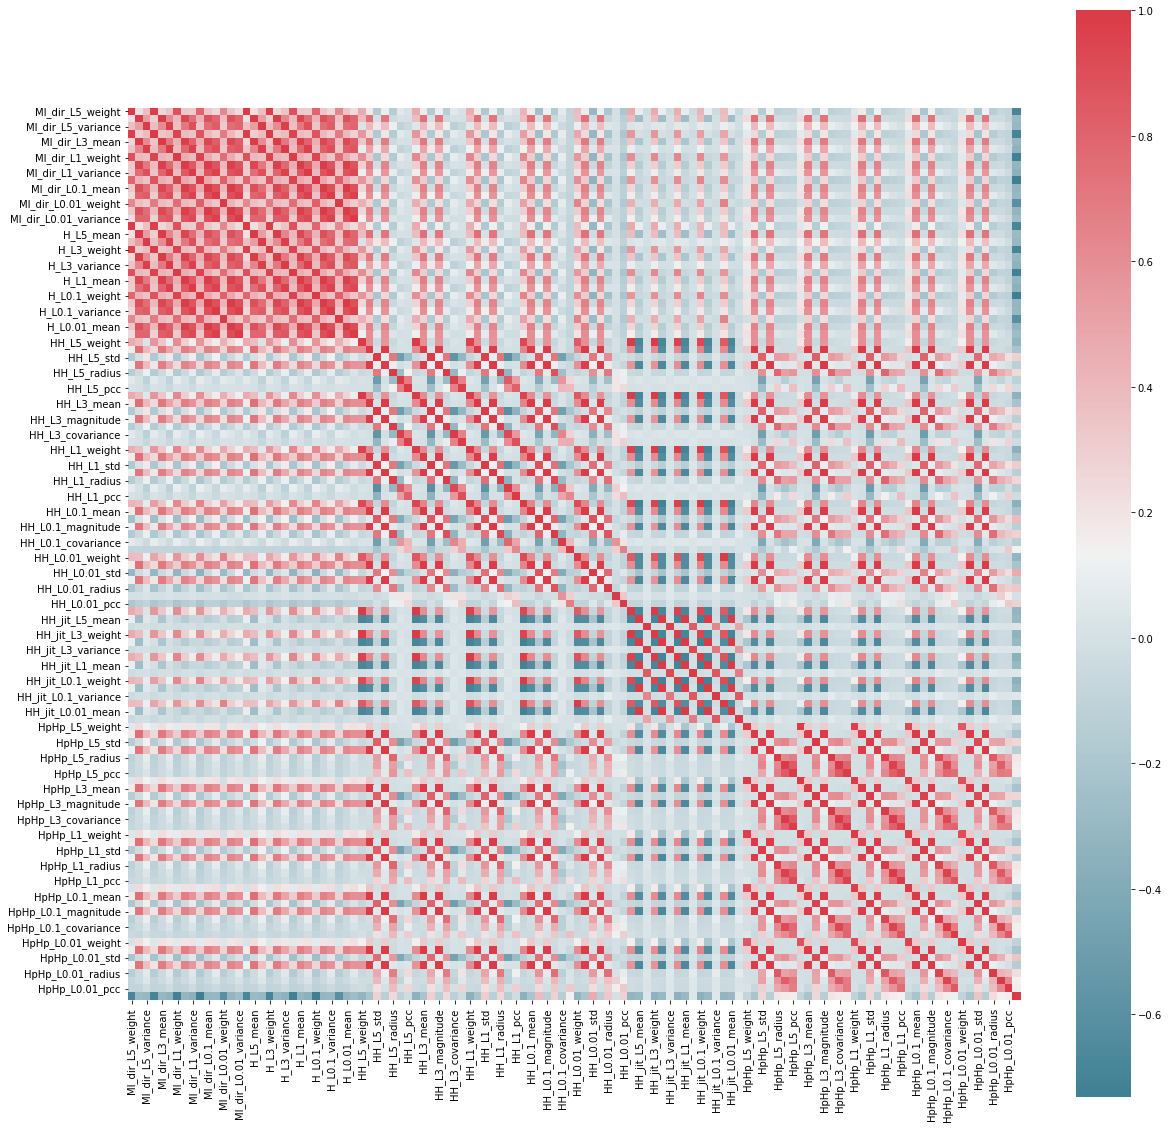

Number of benign and Mirai samples

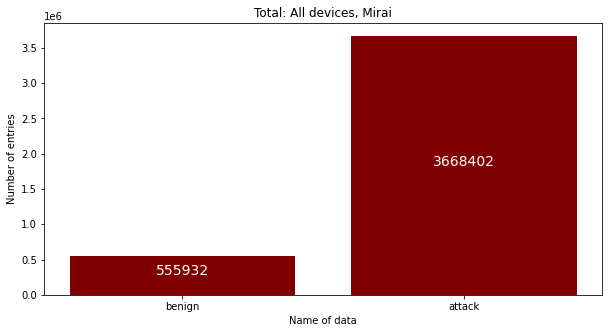

In [ ]:
names = ['benign', 'attack']
num = [merged_dataset[merged_dataset.Label == 1].shape[0], merged_dataset[merged_dataset.Label == -1].shape[0]] 
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, num, color ='maroon')
 
plt.xlabel("Name of data")
plt.ylabel("Number of entries")
plt.title("Total: All devices, Mirai")
for i in range(len(names)):
    plt.text(i, num[i]//2, num[i], ha = 'center', color='white', fontsize=14)
plt.show()

# Feature Selection

Split dataset first to prevent data snooping

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(merged_dataset, test_size=0.10, random_state=42)

Code for variance commented out because time taken to run is too long. Results printed out have been saved below.

In [ ]:
# from statistics import variance

# variances = []
# for col in train.columns:
#   variances.append((col, variance(train[col])))

# variances = sorted(variances, key=lambda x: x[1], reverse=True)

In [ ]:
# print(variances[:10])

[('HH_jit_L0.01_variance', 2.2163755382501456e+32), ('HH_jit_L0.1_variance', 1.3516545516160363e+32), ('HH_jit_L1_variance', 7.341074015183026e+31), ('HH_jit_L3_variance', 4.559950536336305e+31), ('HH_jit_L5_variance', 3.527427896286122e+31), ('HH_jit_L5_mean', 5.303062138083942e+17), ('HH_jit_L3_mean', 5.302873962477011e+17), ('HH_jit_L1_mean', 5.302374986900435e+17), ('HH_jit_L0.1_mean', 5.3011946163002944e+17), ('HH_jit_L0.01_mean', 5.2986633527815904e+17)]

benign samples: 500669
attack samples: 3301231


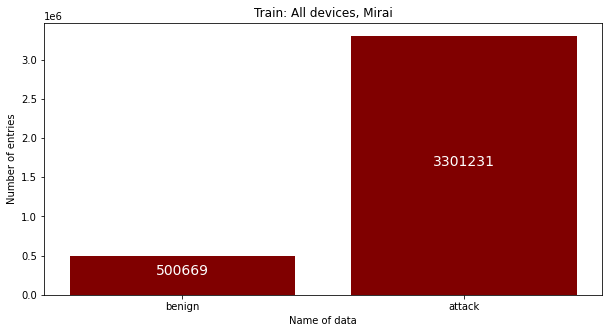

In [ ]:
names = ['benign', 'attack']
num = [train[train.Label == 1].shape[0], train[train.Label == -1].shape[0]] 
print(f'benign samples: {train[train.Label == 1].shape[0]}')
print(f'attack samples: {train[train.Label == -1].shape[0]}') 

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, num, color ='maroon')
plt.xlabel("Name of data")
plt.ylabel("Number of entries")
plt.title("Train: All devices, Mirai")
for i in range(len(names)):
    plt.text(i, num[i]//2, num[i], ha = 'center', color='white', fontsize=14)
plt.show()

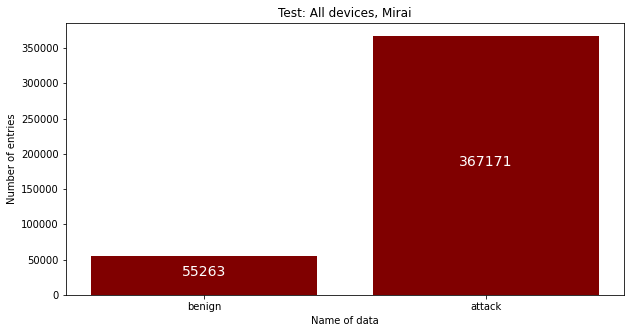

In [ ]:
names = ['benign', 'attack']
num = [test[test.Label == 1].shape[0], test[test.Label == -1].shape[0]] 
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, num, color ='maroon')
plt.xlabel("Name of data")
plt.ylabel("Number of entries")
plt.title("Test: All devices, Mirai")
for i in range(len(names)):
    plt.text(i, num[i]//2, num[i], ha = 'center', color='white', fontsize=14)
plt.show()

Calculate entropy of features

In [ ]:
import scipy.stats

def ent(data):
    """Calculates entropy of the passed `pd.Series`
    """
    p_data = data.value_counts(normalize=True)           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data, base=2)  # get entropy from counts
    return entropy

entropies = []
for col in train.columns:
    entropies.append((col, ent(train[col])))

entropies.sort(key=lambda tup: tup[1], reverse=True)

for i in range(len(entropies)):
  print(entropies[i][0], entropies[i][1])

H_L0.01_weight 20.880618874663696
MI_dir_L0.01_weight 20.88055209241131
H_L0.1_weight 20.879125427645786
MI_dir_L0.1_weight 20.87880629845813
H_L0.01_variance 20.843417558728856
MI_dir_L0.01_variance 20.843253760199428
H_L0.01_mean 20.83953367040847
MI_dir_L0.01_mean 20.839406159592855
H_L0.1_variance 20.837421543203455
MI_dir_L0.1_variance 20.836954651660708
H_L0.1_mean 20.833414976247123
MI_dir_L0.1_mean 20.83320696759144
HH_jit_L0.1_mean 20.793076767845893
HH_jit_L0.01_mean 20.793003791436846
HH_jit_L1_mean 20.788242923280226
HH_jit_L3_mean 20.78725049367826
HH_jit_L5_mean 20.78713736257699
H_L1_weight 20.78069848178093
MI_dir_L1_weight 20.780519183806803
H_L1_variance 20.775932627217646
MI_dir_L1_variance 20.775716201512363
H_L1_mean 20.68741268607115
MI_dir_L1_mean 20.68732583072366
H_L3_weight 20.57256562351612
MI_dir_L3_weight 20.572471574998044
H_L5_weight 20.39173569244536
MI_dir_L5_weight 20.39168647786325
H_L3_variance 20.239777542066268
MI_dir_L3_variance 20.239613607818438

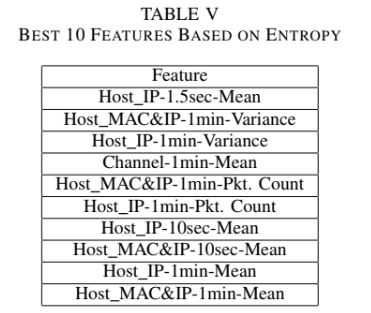

L0.01, L0.1, L1, L3, L5

(100ms, 500ms, 1.5 sec, 10 sec and 1 min)

In [ ]:
best_10_features_entropy = [
    'H_L1_mean',
]

Split into benign and attack classes

In [ ]:
df_benign = train.copy(deep=True)
df_benign = df_benign.loc[df_benign['Label'] == 1]

df_attack = train.copy(deep=True)
df_attack = df_attack.loc[df_attack['Label'] == -1]

keep_cols = ['Label']
for i in range(3):
  keep_cols.append(entropies[i][0])

for col in df_benign.columns:
  if col not in keep_cols:
    df_benign.drop(col, axis=1, inplace=True)
    df_attack.drop(col, axis=1, inplace=True)

In [ ]:
print(df_benign.columns)
print(df_attack.columns)
print(len(df_benign))
print(len(df_attack))

Index(['MI_dir_L0.01_weight', 'H_L0.1_weight', 'H_L0.01_weight', 'Label'], dtype='object')
Index(['MI_dir_L0.01_weight', 'H_L0.1_weight', 'H_L0.01_weight', 'Label'], dtype='object')
500669
3301231


Do sampling for train and test sets

In [ ]:
# num_normal = 2747
num_attack = 20292 
num_test = test.shape[0]
num_normal = df_benign.shape[0]

df_benign = df_benign.sample(n=num_normal, random_state=4)
df_attack = df_attack.sample(n=num_attack, random_state=5)

# X_train = pd.concat([df_benign, df_attack])
X_train = df_benign
y_train = X_train['Label']
X_train.drop('Label', axis=1, inplace=True)

X_test = test.copy(deep=True)
X_test = X_test.sample(n=num_test, random_state=6)
y_test = X_test['Label']
X_test.drop('Label', axis=1, inplace=True)
for col in X_test.columns:
  if col not in keep_cols:
    X_test.drop(col, axis=1, inplace=True)

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

Perform normalization for train and test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_normalized = X_train.copy(deep=True)
X_test_normalized = X_test.copy(deep=True)
X_train_normalized[X_train_normalized.columns] = scaler.fit_transform(X_train_normalized)
X_test_normalized[X_test_normalized.columns] = scaler.transform(X_test_normalized)

In [ ]:
X_train_normalized.head()

,MI_dir_L0.01_weight,H_L0.1_weight,H_L0.01_weight
58506,-0.233592,-0.246753,-0.233627
78793,0.416940,-0.108086,0.416924
171473,1.563119,1.079698,1.563135
119092,0.977687,0.749752,0.977687
107977,0.479378,-0.078222,0.479364


In [ ]:
X_train_normalized.columns

Index(['MI_dir_L0.01_weight', 'H_L0.1_weight', 'H_L0.01_weight'], dtype='object')

Feature visualization. Red for benign, blue for attack

In [ ]:
y_train_new = ['red' if x == 1 else 'blue' if x == -1 else 'error' for x in y_train]

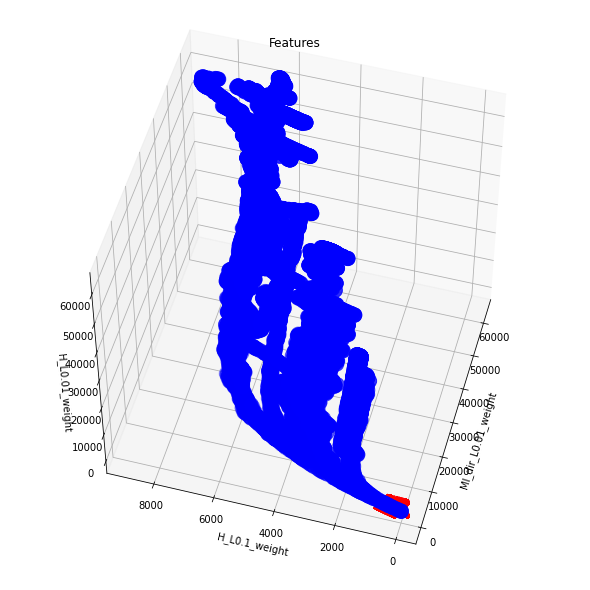

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#1 - Segment Our Data Frame
# df_benign
# df_attack

fig = plt.figure(figsize=(8, 8))
axes = Axes3D(fig)
#2 - Add Two Separate Scatter Plots To The Axes Object
axes.scatter(df_benign['MI_dir_L0.01_weight'], df_benign['H_L0.1_weight'], df_benign['H_L0.01_weight'], c="red", marker="x", s=200)
axes.scatter(df_attack['MI_dir_L0.01_weight'], df_attack['H_L0.1_weight'], df_attack['H_L0.01_weight'], c="blue", marker="o", s=200)

axes.set_title("Features")
axes.set_xlabel('MI_dir_L0.01_weight')
axes.set_ylabel('H_L0.1_weight')
axes.set_zlabel('H_L0.01_weight')
#3 - Adjusting The X, Y, And Z Axis Limits 
# axes.set_xlim(0, 10)
# axes.set_ylim(0, 10)
# axes.set_zlim(0, 10)
#4 - Display The Above Chart Configuration
axes.view_init(51.25, -164.5)
plt.show()

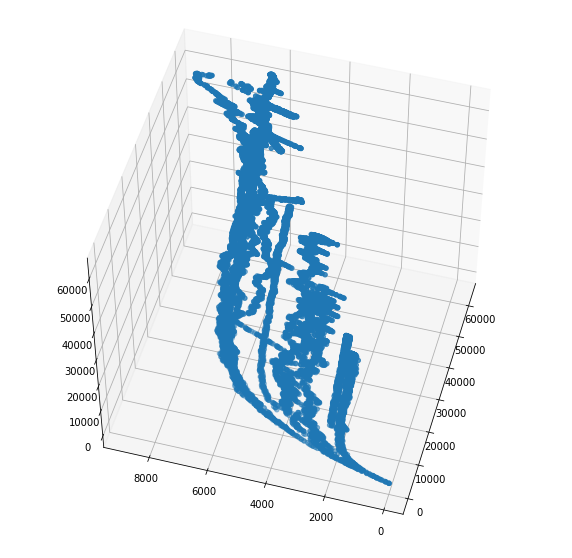

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df_attack['MI_dir_L0.01_weight']
y = df_attack['H_L0.1_weight']
z = df_attack['H_L0.01_weight']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = {'benign':'red', 'attack':'green'}
ax.scatter(x, y, z)
ax.view_init(51.25, -164.5)
plt.show()

In [ ]:
# clf = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto') #-1 for outliers, 1 for inliers
# clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)

OCSVM code

In [ ]:
import time

In [ ]:
start = time.time()
clf_ocsvm = OneClassSVM(nu=0.0004, kernel='rbf', gamma='auto') #-1 for outliers, 1 for inliers
clf_ocsvm.fit(X_train_normalized)
end = time.time()
print(f'Total training samples = {X_train_normalized.shape[0]}, Training time taken = {end - start} seconds')

Total training samples = 500669, Training time taken = 25.349236249923706 seconds


In [ ]:
y_pred_train = clf_ocsvm.predict(X_train_normalized)
y_pred_test = clf_ocsvm.predict(X_test_normalized)

In [ ]:
print(len(y_test))
print(len(y_pred_test))
print(len(set(y_pred_train)))
print(len(set(y_pred_test)))

422434
422434
2
2


In [ ]:
y_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_test]
y_pred_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_pred_test]

if 'error' in y_test_new or 'error' in y_pred_test_new:
  print('error')
else:
  print('alls good')

alls good


In [ ]:
test_benign_samples = len([x for x in y_test_new if x == 'benign'])
print(f'number of benign samples in y test true: {test_benign_samples}')

pred_benign_samples = len([x for x in y_pred_test_new if x == 'benign'])
print(f'number of benign samples in y test pred: {pred_benign_samples}')

test_att_samples = len([x for x in y_test_new if x == 'attack'])
print(f'number of attack samples in y test true: {test_att_samples}')

pred_att_samples = len([x for x in y_pred_test_new if x == 'attack'])
print(f'number of attack samples in y test pred: {pred_att_samples}')


number of benign samples in y test true: 55263
number of benign samples in y test pred: 55365
number of attack samples in y test true: 367171
number of attack samples in y test pred: 367069


[[ 55239     24]
 [   126 367045]]


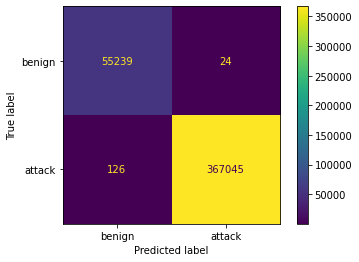

Positive class: attack. Negative class: benign.
Accuracy: 0.9996449149452933
Precision: 0.9999346171973117
Recall: 0.9996568356433378


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_new, y_pred_test_new, labels=['benign', 'attack'])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'attack'])
disp.plot()
plt.show()
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
print('Positive class: attack. Negative class: benign.')
print(f'Accuracy: {(tp+tn)/(tp+fp+fn+tn)}')
print(f'Precision: {(tp)/(tp+fp)}')
print(f'Recall: {(tp)/(tp+fn)}')

Isolation Forest code

In [ ]:
from sklearn.ensemble import IsolationForest
start = time.time()
clf_iso = IsolationForest(random_state=0, contamination='auto').fit(X_train_normalized)
end = time.time()
print(f'Total training samples = {X_train_normalized.shape[0]}, Training time taken = {end - start} seconds')
y_pred_train = clf_iso.predict(X_train_normalized)
y_pred_test = clf_iso.predict(X_test_normalized)

Total training samples = 500669, Training time taken = 1.4231603145599365 seconds


In [ ]:
y_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_test]
y_pred_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_pred_test]

if 'error' in y_test_new or 'error' in y_pred_test_new:
  print('error')
else:
  print('alls good')

alls good


In [ ]:
test_benign_samples = len([x for x in y_test_new if x == 'benign'])
print(f'number of benign samples in y test true: {test_benign_samples}')

pred_benign_samples = len([x for x in y_pred_test_new if x == 'benign'])
print(f'number of benign samples in y test pred: {pred_benign_samples}')

test_att_samples = len([x for x in y_test_new if x == 'attack'])
print(f'number of attack samples in y test true: {test_att_samples}')

pred_att_samples = len([x for x in y_pred_test_new if x == 'attack'])
print(f'number of attack samples in y test pred: {pred_att_samples}')

number of benign samples in y test true: 55263
number of benign samples in y test pred: 45949
number of attack samples in y test true: 367171
number of attack samples in y test pred: 376485


[[ 45949   9314]
 [     0 367171]]


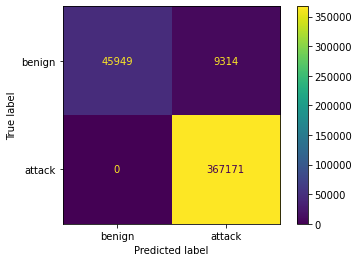

Positive class: attack. Negative class: benign.
Accuracy: 0.9779515853364076
Precision: 0.9752606345538335
Recall: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_new, y_pred_test_new, labels=['benign', 'attack'])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'attack'])
disp.plot()
plt.show()
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
print('Positive class: attack. Negative class: benign.')
print(f'Accuracy: {(tp+tn)/(tp+fp+fn+tn)}')
print(f'Precision: {(tp)/(tp+fp)}')
print(f'Recall: {(tp)/(tp+fn)}')

Isolation Forest without Normalization

Total training samples = 500669, Training time taken = 1.4045696258544922 seconds
alls good
number of benign samples in y test true: 55263
number of benign samples in y test pred: 45987
number of attack samples in y test true: 367171
number of attack samples in y test pred: 376447
[[ 45987   9276]
 [     0 367171]]


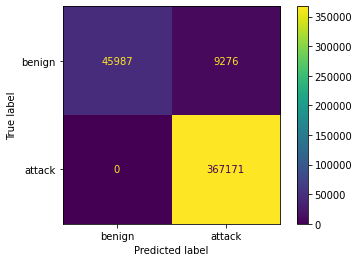

Positive class: attack. Negative class: benign.
Accuracy: 0.9780415402169333
Precision: 0.9753590810924248
Recall: 1.0


In [ ]:
start = time.time()
clf_iso = IsolationForest(random_state=0, contamination='auto').fit(X_train)
end = time.time()
print(f'Total training samples = {X_train_normalized.shape[0]}, Training time taken = {end - start} seconds')
y_pred_train = clf_iso.predict(X_train)
y_pred_test = clf_iso.predict(X_test)

y_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_test]
y_pred_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_pred_test]


if 'error' in y_test_new or 'error' in y_pred_test_new:
  print('error')
else:
  print('alls good')


test_benign_samples = len([x for x in y_test_new if x == 'benign'])
print(f'number of benign samples in y test true: {test_benign_samples}')

pred_benign_samples = len([x for x in y_pred_test_new if x == 'benign'])
print(f'number of benign samples in y test pred: {pred_benign_samples}')

test_att_samples = len([x for x in y_test_new if x == 'attack'])
print(f'number of attack samples in y test true: {test_att_samples}')

pred_att_samples = len([x for x in y_pred_test_new if x == 'attack'])
print(f'number of attack samples in y test pred: {pred_att_samples}')

cm = confusion_matrix(y_test_new, y_pred_test_new, labels=['benign', 'attack'])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'attack'])
disp.plot()
plt.show()
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
print('Positive class: attack. Negative class: benign.')
print(f'Accuracy: {(tp+tn)/(tp+fp+fn+tn)}')
print(f'Precision: {(tp)/(tp+fp)}')
print(f'Recall: {(tp)/(tp+fn)}')

Attempting some ensembling here

alls good
number of benign samples in y test true: 55263
number of benign samples in y test pred: 55365
number of attack samples in y test true: 367171
number of attack samples in y test pred: 367069
[[ 55239     24]
 [   126 367045]]


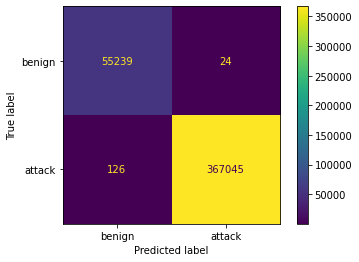

Positive class: attack. Negative class: benign.
Accuracy: 0.9996449149452933
Precision: 0.9999346171973117
Recall: 0.9996568356433378


In [ ]:
y_test_ocsvm = clf_ocsvm.predict(X_test_normalized)
y_test_iso_forest_unnormalized = clf_iso.predict(X_test)
y_pred_test = []

for idx, j in enumerate(y_test_iso_forest_unnormalized):
  if j > 0 and y_test_ocsvm[idx] > 0:
    y_pred_test.append(j)
  else:
    y_pred_test.append(y_test_ocsvm[idx])

y_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_test]
y_pred_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_pred_test]


if 'error' in y_test_new or 'error' in y_pred_test_new:
  print('error')
else:
  print('alls good')


test_benign_samples = len([x for x in y_test_new if x == 'benign'])
print(f'number of benign samples in y test true: {test_benign_samples}')

pred_benign_samples = len([x for x in y_pred_test_new if x == 'benign'])
print(f'number of benign samples in y test pred: {pred_benign_samples}')

test_att_samples = len([x for x in y_test_new if x == 'attack'])
print(f'number of attack samples in y test true: {test_att_samples}')

pred_att_samples = len([x for x in y_pred_test_new if x == 'attack'])
print(f'number of attack samples in y test pred: {pred_att_samples}')

cm = confusion_matrix(y_test_new, y_pred_test_new, labels=['benign', 'attack'])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'attack'])
disp.plot()
plt.show()
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
print('Positive class: attack. Negative class: benign.')
print(f'Accuracy: {(tp+tn)/(tp+fp+fn+tn)}')
print(f'Precision: {(tp)/(tp+fp)}')
print(f'Recall: {(tp)/(tp+fn)}')